# Utils

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread
import json

# crea la cartella per i grafici se non esiste
os.makedirs("images/hist/", exist_ok=True)
os.makedirs("images/comparison/", exist_ok=True)
os.makedirs("images/heatmaps/", exist_ok=True)
os.makedirs("images/sparsita/", exist_ok=True)
os.makedirs("images/lines/", exist_ok=True)
os.makedirs("images/eigenvalues/", exist_ok=True)

def plot_errors(matrix_names, errors, tols):
  j = 0
  for tol in tols:

    # data definition
    _data = {'spa1.mtx': errors[0][j],
            'spa2.mtx': errors[1][j],
              'vem1.mtx': errors[2][j],
              'vem2.mtx': errors[3][j]}
    _df = pd.DataFrame(_data,columns=matrix_names, index = ['Jacobi', 'Gauss-Seidel', 'Gradient', 'Conjugated Gradient'])

    plt.figure(figsize=(12, 12))
    # bar chart
    ax = _df.plot.bar()
    ax.set_title("Error" + " - " + str(tol))
    ax.set_xlabel("Method")
    ax.set_ylabel("Error")
    plt.xticks(rotation=0)
    ax.legend()
    plt.savefig("images/hist/Error - " + str(tol) + ".png", bbox_inches='tight')
    
    j = j + 1

def plot_elapsed_times(matrix_names, elapsed_times, tols, Dense):
  j = 0
  for tol in tols:
    print("tol: ", tol)

    # data definition
    _data = {'spa1.mtx': elapsed_times[0][j],
            'spa2.mtx': elapsed_times[1][j],
              'vem1.mtx': elapsed_times[2][j],
              'vem2.mtx': elapsed_times[3][j]}
    _df = pd.DataFrame(_data,columns=matrix_names, index = ['Jacobi', 'Gauss-Seidel', 'Gradient', 'Conjugated Gradient'])

    # bar chart
    plt.figure(figsize=(12, 12))
    ax = _df.plot.bar()
    ax.set_title("Elapsed Time" + " - " + str(tol))
    if Dense:
      ax.set_xlabel("Method (Dense)")
    else:
      ax.set_xlabel("Method (Sparse)")
    ax.set_ylabel("Time (s)")
    plt.xticks(rotation=0)
    ax.legend()

    if Dense:
      plt.savefig("images/hist/(DENSE) Elapsed Time - " + str(tol) + ".png", bbox_inches='tight')
    else:
      plt.savefig("images/hist/(SPARSE) Elapsed Time - " + str(tol) + ".png", bbox_inches='tight')

    j = j + 1

def plot_it_numbers(matrix_names, it_numbers, tols):
  j = 0
  for tol in tols:
    print("tol: ", tol)

    # data definition
    _data = {'spa1.mtx': it_numbers[0][j],
            'spa2.mtx': it_numbers[1][j],
              'vem1.mtx': it_numbers[2][j],
              'vem2.mtx': it_numbers[3][j]}
    _df = pd.DataFrame(_data,columns=matrix_names, index = ['Jacobi', 'Gauss-Seidel', 'Gradient', 'Conjugated Gradient'])

    # bar chart
    plt.figure(figsize=(12, 12))
    ax = _df.plot.bar()
    ax.set_title("Iteration Number" + " - " + str(tol))
    ax.set_xlabel("Method")
    ax.set_ylabel("Iteration Number")
    plt.xticks(rotation=0)
    ax.legend()
    plt.savefig("images/hist/Iteration Number - " + str(tol) + ".png", bbox_inches='tight')

    j = j + 1

# Rileggo i dati e faccio i grafici

In [ ]:
with open('dati_sparsi.json', 'r') as f:
    dati_sparsi = json.load(f)

errors_sparse = np.array(dati_sparsi['errors_sparse'])
it_numbers_sparse = np.array(dati_sparsi['it_numbers_sparse'])
elapsed_times_sparse = np.array(dati_sparsi['elapsed_times_sparse'])


with open('dati_densi.json', 'r') as f:
    dati_densi = json.load(f)

errors = np.array(dati_densi['errors_dense'])
it_numbers = np.array(dati_densi['it_numbers_dense'])
elapsed_times = np.array(dati_densi['elapsed_times_dense'])

In [18]:
it_numbers == it_numbers_sparse

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [16]:
errors - errors_sparse < 10**(-10)

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

tol:  0.0001
tol:  1e-06
tol:  1e-08
tol:  1e-10
tol:  0.0001
tol:  1e-06
tol:  1e-08


C:\Users\aless\AppData\Local\Temp\ipykernel_8316\3410894879.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 12))


tol:  1e-10
tol:  0.0001
tol:  1e-06
tol:  1e-08
tol:  1e-10


<Figure size 1200x1200 with 0 Axes>

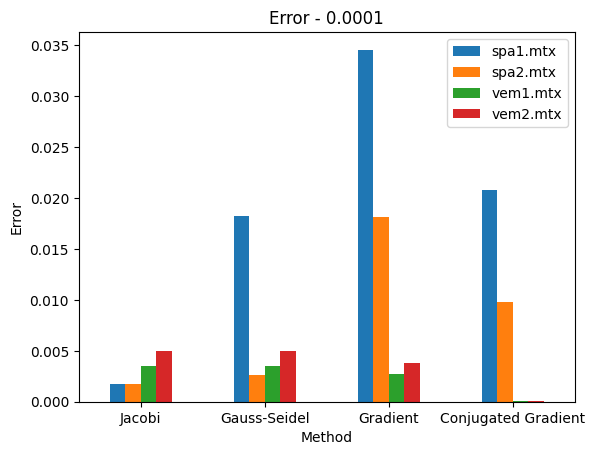

<Figure size 1200x1200 with 0 Axes>

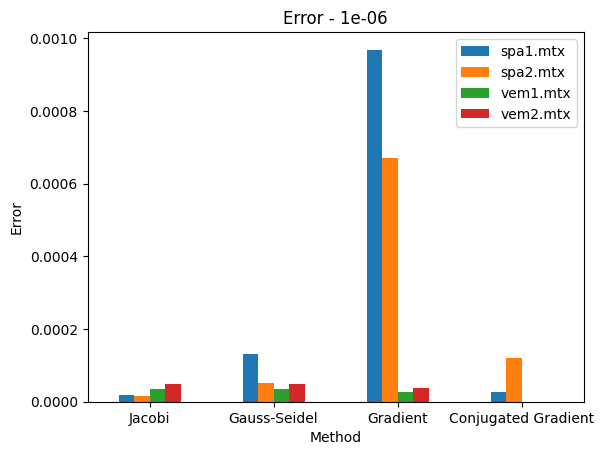

<Figure size 1200x1200 with 0 Axes>

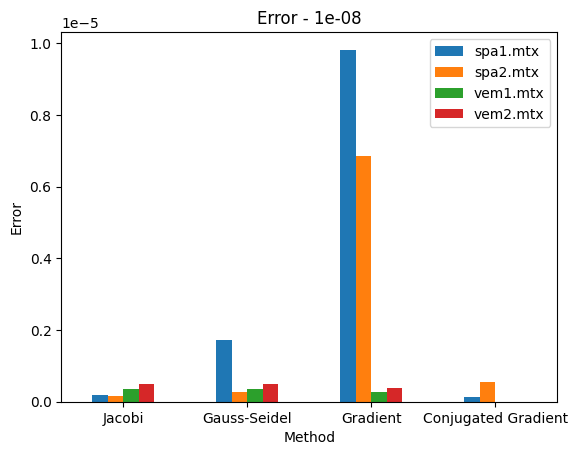

<Figure size 1200x1200 with 0 Axes>

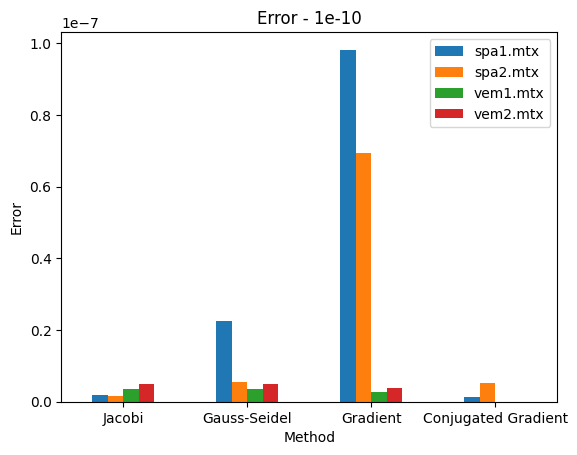

<Figure size 1200x1200 with 0 Axes>

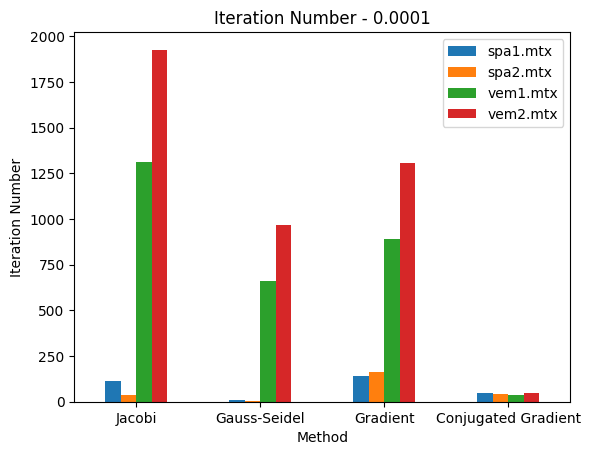

<Figure size 1200x1200 with 0 Axes>

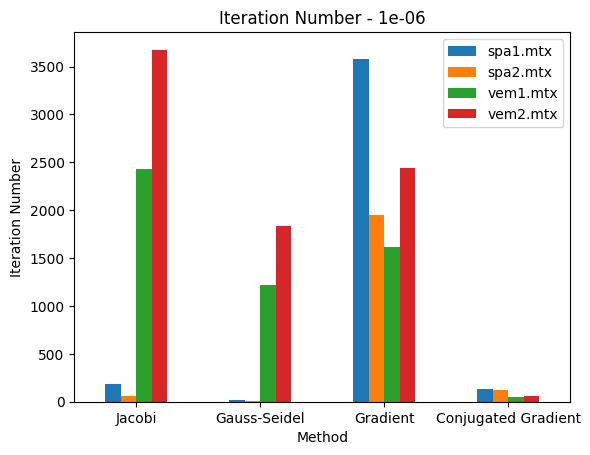

<Figure size 1200x1200 with 0 Axes>

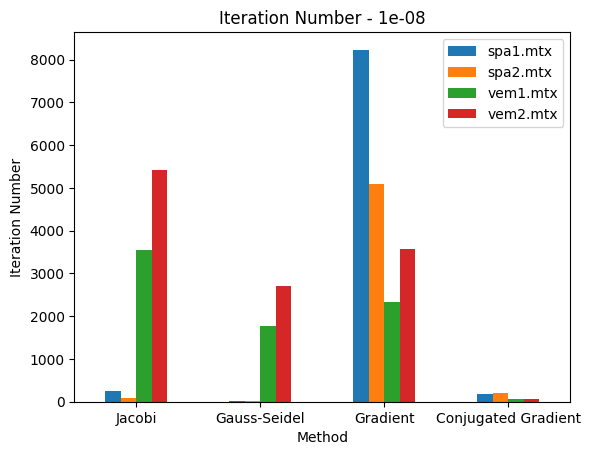

<Figure size 1200x1200 with 0 Axes>

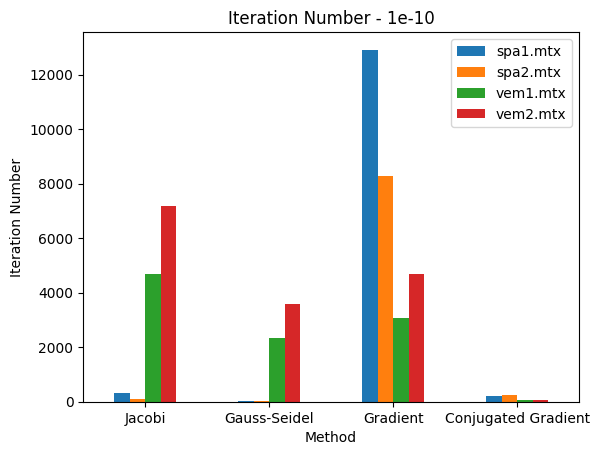

<Figure size 1200x1200 with 0 Axes>

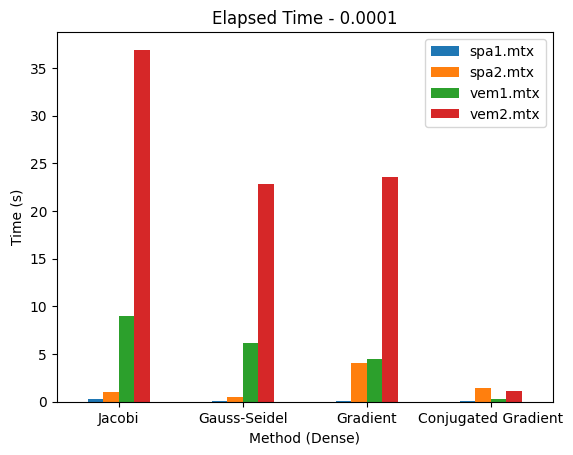

<Figure size 1200x1200 with 0 Axes>

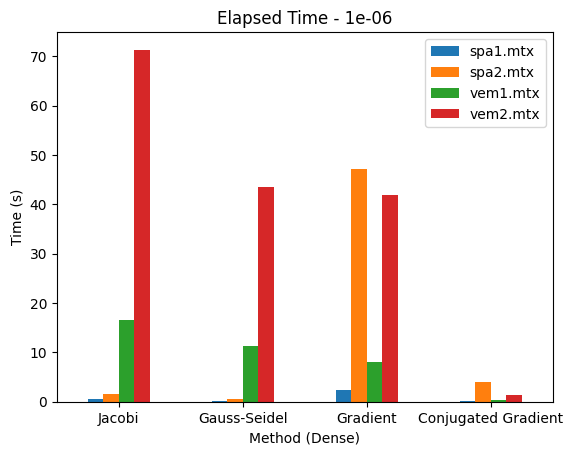

<Figure size 1200x1200 with 0 Axes>

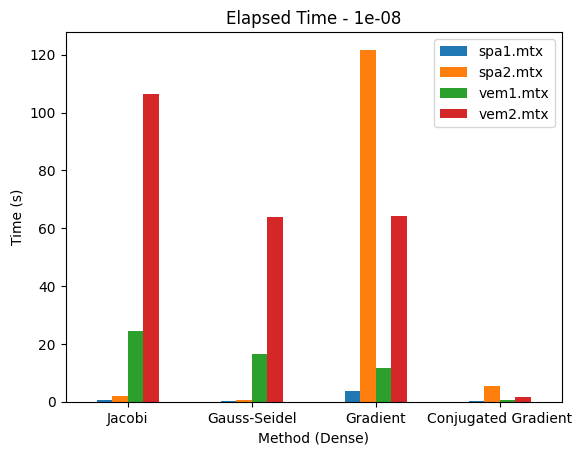

<Figure size 1200x1200 with 0 Axes>

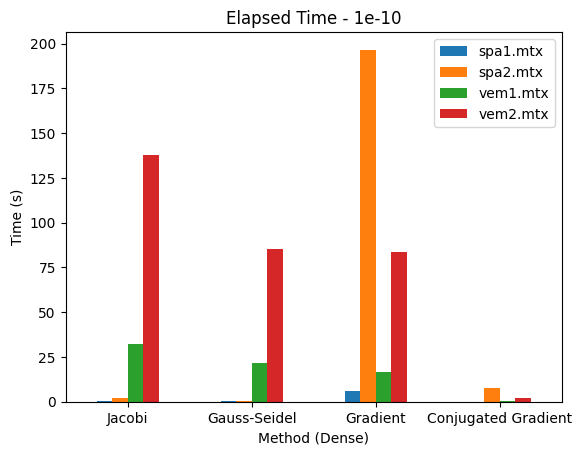

<Figure size 1200x1200 with 0 Axes>

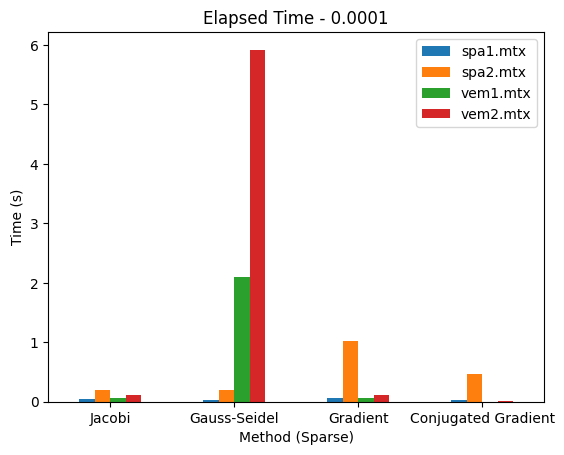

<Figure size 1200x1200 with 0 Axes>

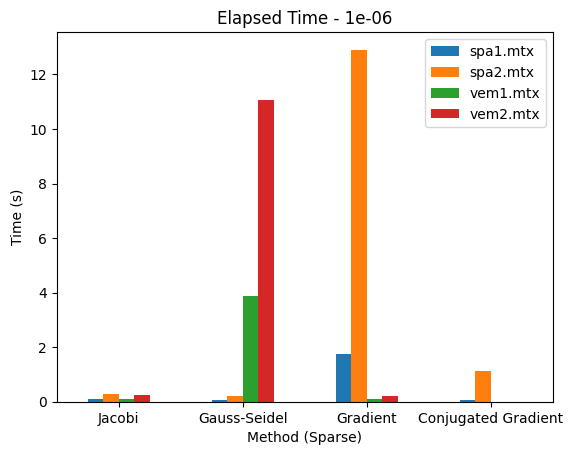

<Figure size 1200x1200 with 0 Axes>

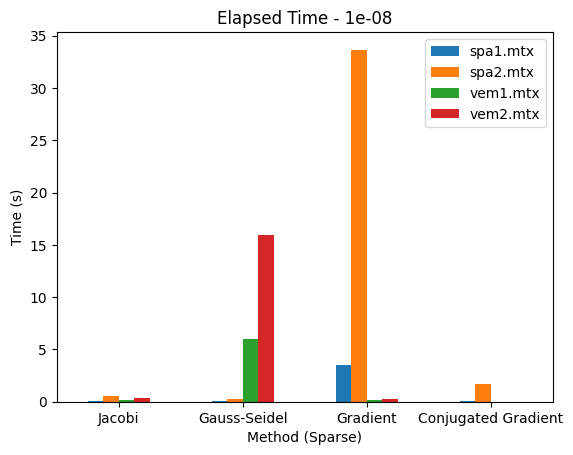

<Figure size 1200x1200 with 0 Axes>

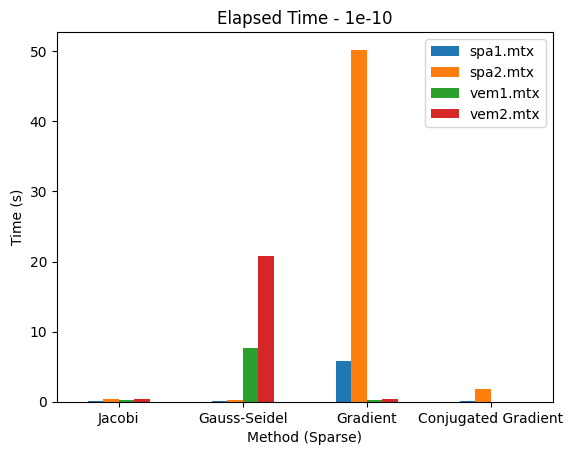

In [ ]:
matrix_names = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
tols = [10**(-4), 10**(-6), 10**(-8), 10**(-10)]

#dense
plot_errors(matrix_names, errors, tols)
plot_it_numbers(matrix_names, it_numbers, tols)
plot_elapsed_times(matrix_names, elapsed_times, tols, Dense = True)

#sparse
plot_elapsed_times(matrix_names, elapsed_times_sparse, tols, Dense = False)

In [ ]:
#per creare tutte le matrici belle da vedere
import seaborn as sns
%matplotlib inline
metodi = ["Jacobi", "Gauss-Seidel", "Gradient", "Conjugated Gradient"]
#[matrice, tol, metodo]
##############DENSE == SPARSE##################################

i = 0
for matrix_name in matrix_names:
  plt.figure(figsize=(7, 7))
  df = pd.DataFrame(it_numbers[i], index=tols, columns=metodi)
  ax = sns.heatmap(df, annot=True, cmap='viridis', fmt='.0f')
  ax.set_title("Iteration Number - " + matrix_name)
  ax.set_xlabel('Method')
  ax.set_ylabel('Tol')
  plt.xticks(rotation=0)
  plt.tight_layout()  #non far sovrapporre etichette
  plt.savefig("images/heatmaps/Iteration Number - " + matrix_name + ".png", bbox_inches='tight')
  plt.clf()

  i = i + 1

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

C:\Users\aless\AppData\Local\Temp\ipykernel_8316\3985815681.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 12))


<Figure size 1200x1200 with 0 Axes>

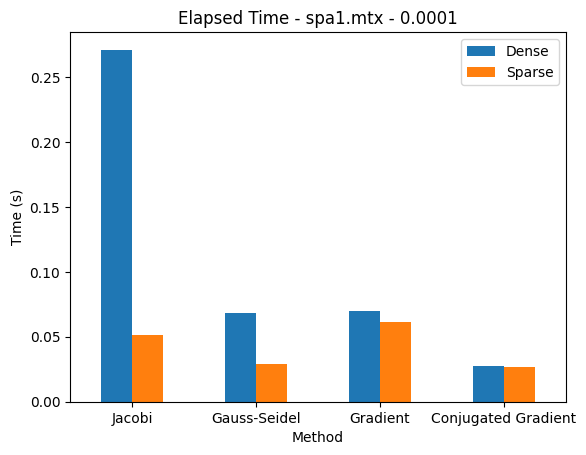

<Figure size 1200x1200 with 0 Axes>

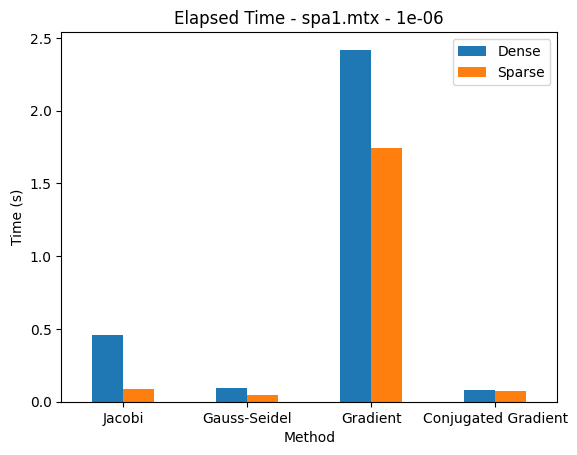

<Figure size 1200x1200 with 0 Axes>

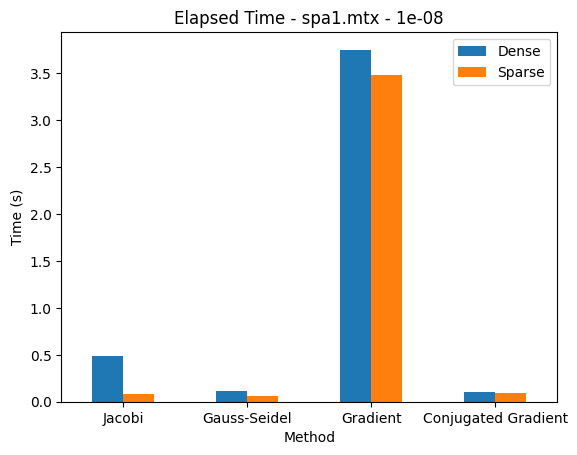

<Figure size 1200x1200 with 0 Axes>

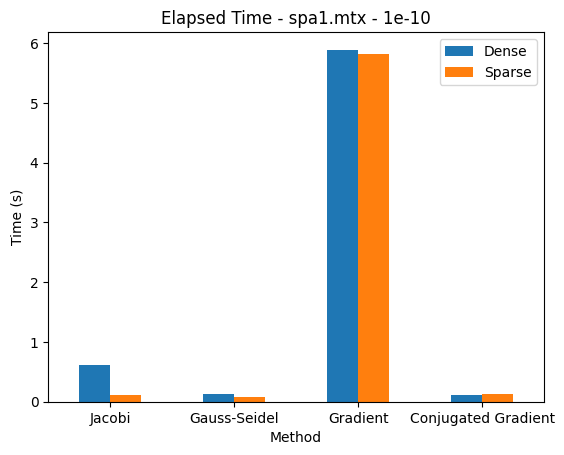

<Figure size 1200x1200 with 0 Axes>

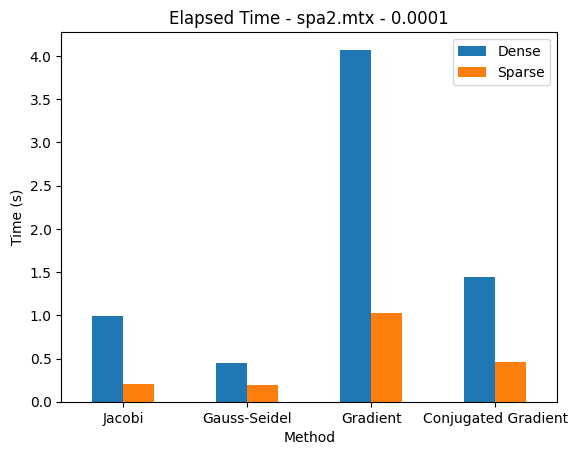

<Figure size 1200x1200 with 0 Axes>

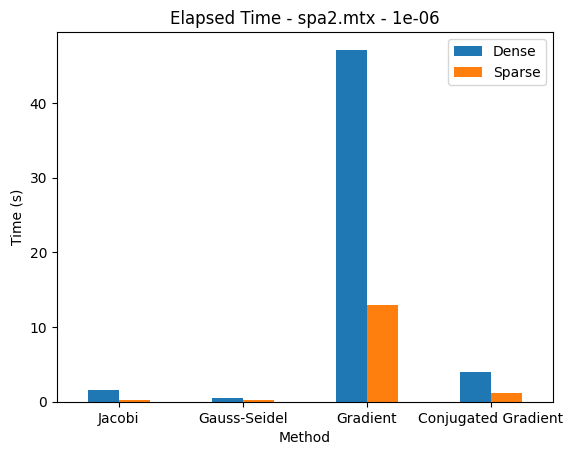

<Figure size 1200x1200 with 0 Axes>

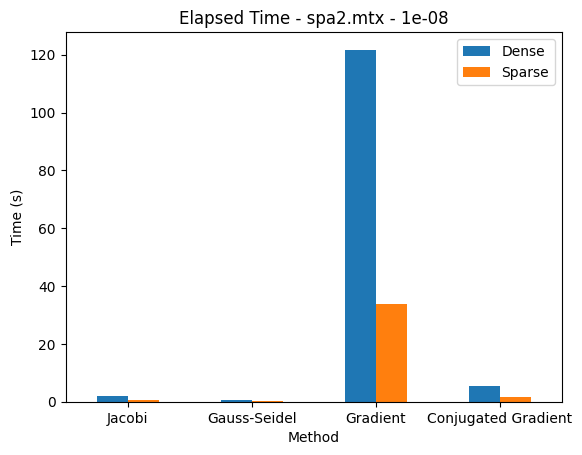

<Figure size 1200x1200 with 0 Axes>

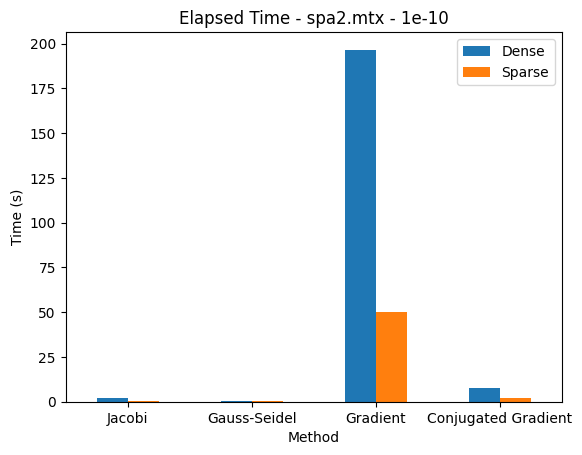

<Figure size 1200x1200 with 0 Axes>

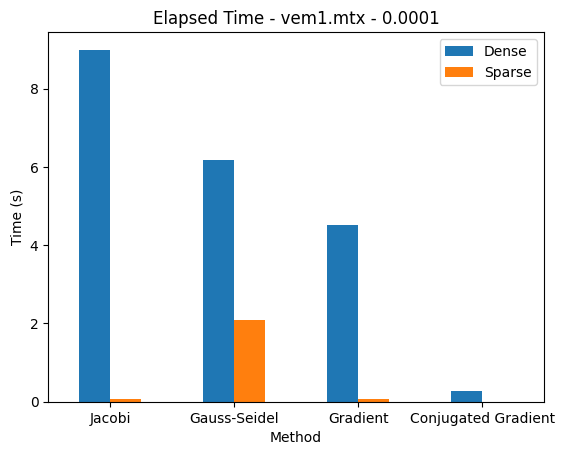

<Figure size 1200x1200 with 0 Axes>

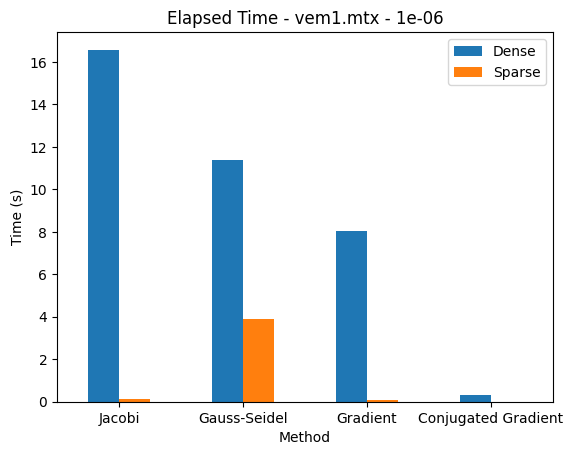

<Figure size 1200x1200 with 0 Axes>

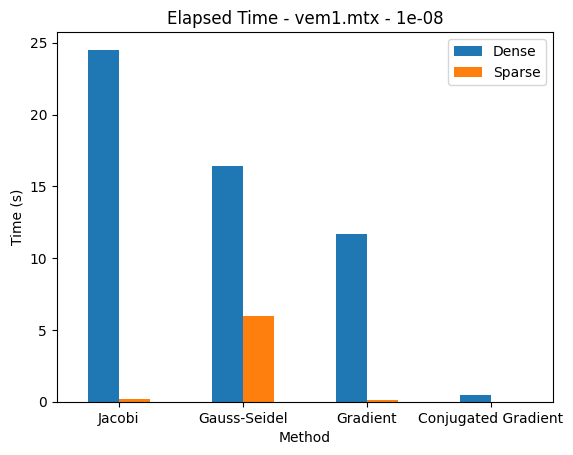

<Figure size 1200x1200 with 0 Axes>

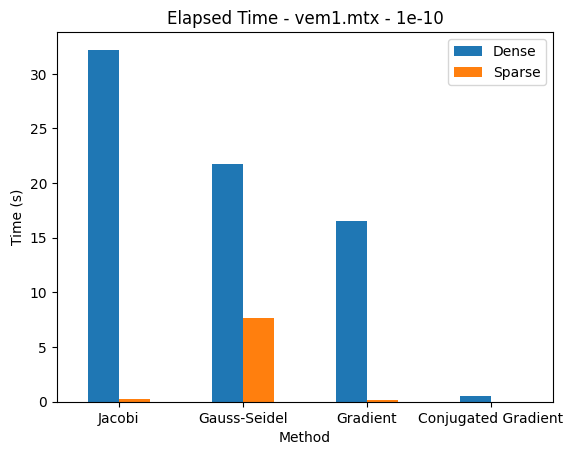

<Figure size 1200x1200 with 0 Axes>

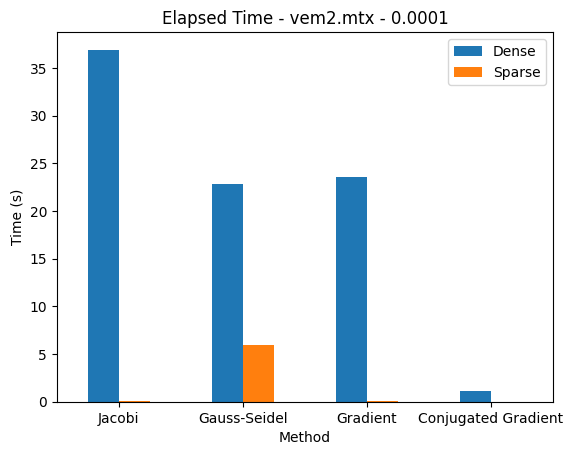

<Figure size 1200x1200 with 0 Axes>

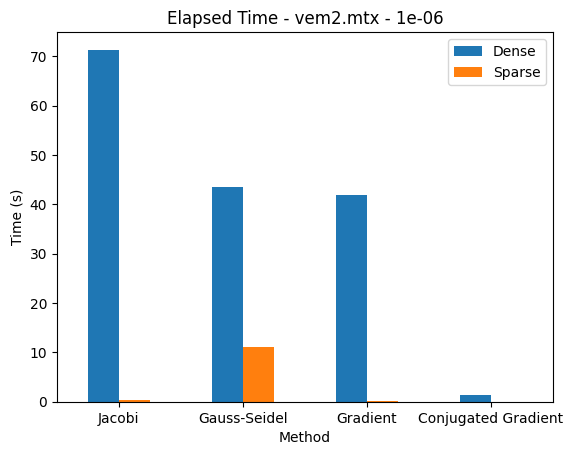

<Figure size 1200x1200 with 0 Axes>

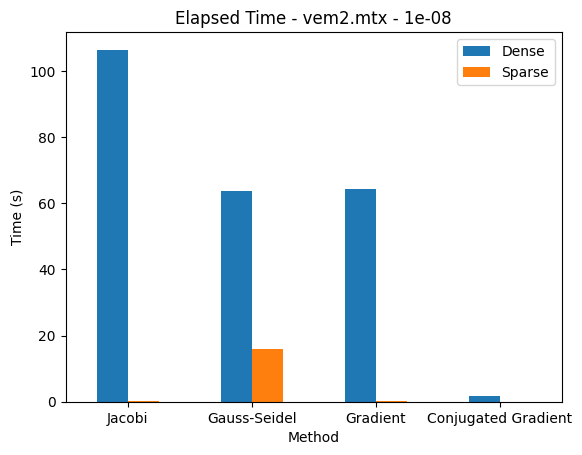

<Figure size 1200x1200 with 0 Axes>

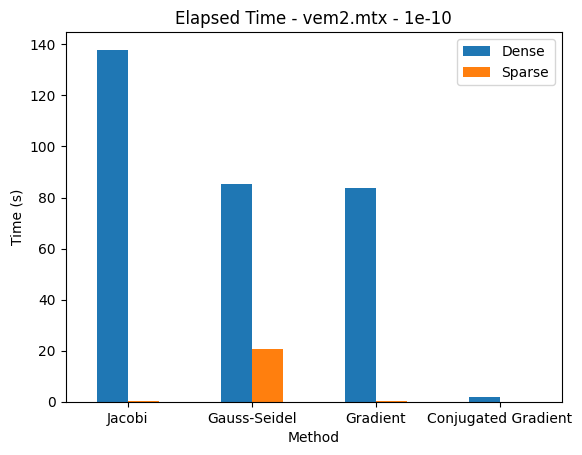

In [ ]:
####STACKED BARS X CONFRONTARE I TEMPI DI EXE TRA SPARSI E DENSI (ERRORI E N_IT SONO IDENTICI) - AL VARIARE DELLA TOL E DELLA MATRICE

i = 0
for matrix_name in matrix_names:
  j = 0
  for tol in tols:
    plt.figure(figsize=(12, 12))
    df = pd.DataFrame({'Dense': elapsed_times[i][j],
                   'Sparse': elapsed_times_sparse[i][j]}, index=metodi)
    ax = df.plot.bar(rot=0)
    ax.set_title('Elapsed Time - ' + matrix_name + " - " + str(tol))
    ax.set_xlabel('Method')
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.savefig("images/comparison/Elapsed Time - " + matrix_name + " - " + str(tol) + ".png", bbox_inches='tight')
    j = j + 1
  i = i + 1

## Linee

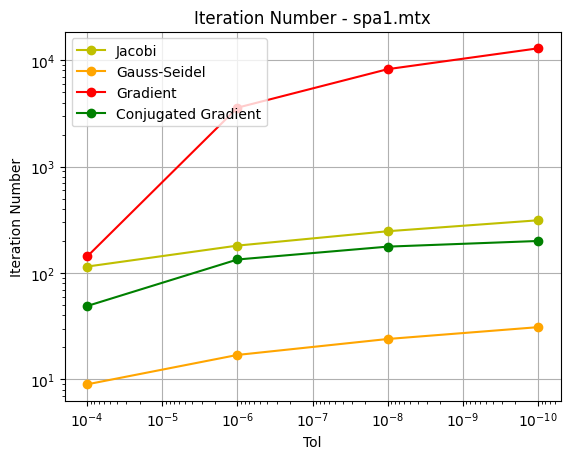

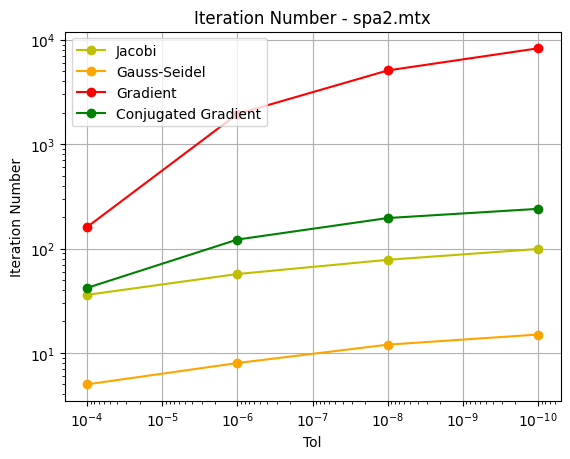

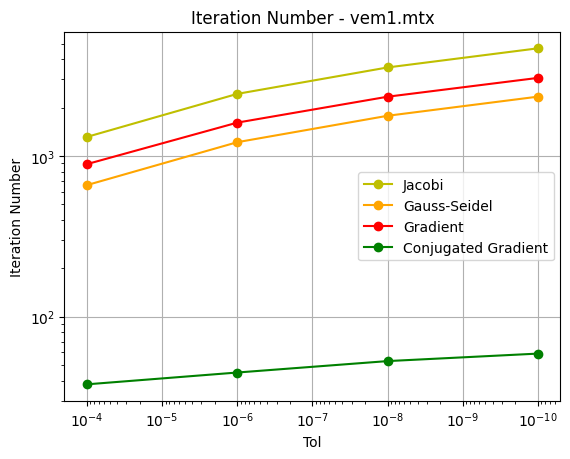

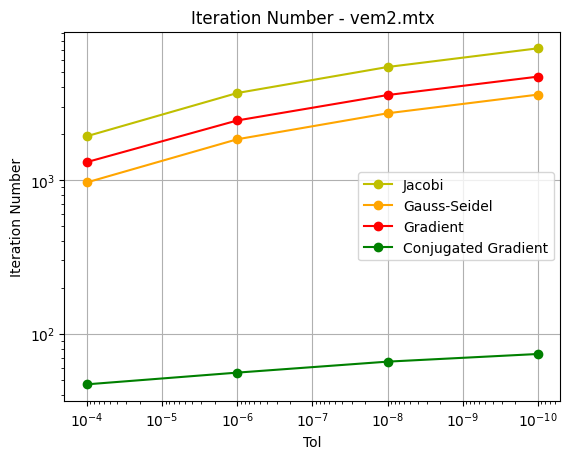

In [ ]:
#[matrice, tol, metodo]
i = 0
for matrix_name in matrix_names:

    plt.plot(tols, it_numbers[i][:, 0], marker='o', linestyle='-', color='y', label='Jacobi')
    plt.plot(tols, it_numbers[i][:, 1], marker='o', linestyle='-', color='#FFA500', label='Gauss-Seidel')
    plt.plot(tols, it_numbers[i][:, 2], marker='o', linestyle='-', color='r', label='Gradient')
    plt.plot(tols, it_numbers[i][:, 3], marker='o', linestyle='-', color='g', label='Conjugated Gradient')

    plt.xscale('log')
    plt.gca().invert_xaxis()  # inverte l'asse X
    
    plt.title('Iteration Number - ' + matrix_name)
    plt.xlabel('Tol')
    plt.ylabel('Iteration Number')
    plt.legend()
    plt.grid(True)
    
    plt.savefig("images/lines/It Number - " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    i = i + 1


In [ ]:
#[matrice, tol, metodo]
i = 0
for matrix_name in matrix_names:

    plt.plot([], [], ' ', label='DENSE')
    plt.plot(tols, elapsed_times[i][:, 0], marker='o', linestyle='-', color='y', label='Jacobi')
    plt.plot(tols, elapsed_times[i][:, 1], marker='o', linestyle='-', color='#FFA500', label='Gauss-Seidel')
    plt.plot(tols, elapsed_times[i][:, 2], marker='o', linestyle='-', color='r', label='Gradient')
    plt.plot(tols, elapsed_times[i][:, 3], marker='o', linestyle='-', color='g', label='Conjugated Gradient')

    plt.xscale('log')
    plt.gca().invert_xaxis()  # inverte l'asse X
    
    plt.title('Elapsed Times - ' + matrix_name)
    plt.xlabel('Tol')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)

    plt.savefig("images/lines/Elapsed Times (DENSE) - " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    i = i + 1


<Figure size 640x480 with 0 Axes>

In [ ]:
#[matrice, tol, metodo]
i = 0
for matrix_name in matrix_names:

    plt.plot([], [], ' ', label='SPARSE')
    plt.plot(tols, elapsed_times_sparse[i][:, 0], marker='o', linestyle='-', color='y', label='Jacobi')
    plt.plot(tols, elapsed_times_sparse[i][:, 1], marker='o', linestyle='-', color='#FFA500', label='Gauss-Seidel')
    plt.plot(tols, elapsed_times_sparse[i][:, 2], marker='o', linestyle='-', color='r', label='Gradient')
    plt.plot(tols, elapsed_times_sparse[i][:, 3], marker='o', linestyle='-', color='g', label='Conjugated Gradient')

    plt.xscale('log')
    plt.gca().invert_xaxis()  # inverte l'asse X
    
    plt.title('Elapsed Times - ' + matrix_name)
    plt.xlabel('Tol')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)

    plt.savefig("images/lines/Elapsed Times (SPARSE) - " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    i = i + 1


<Figure size 640x480 with 0 Axes>

In [ ]:
#[matrice, tol, metodo]
i = 0
for matrix_name in matrix_names:

    plt.plot(tols, errors[i][:, 0], marker='o', linestyle='-', color='y', label='Jacobi')
    plt.plot(tols, errors[i][:, 1], marker='o', linestyle='-', color='#FFA500', label='Gauss-Seidel')
    plt.plot(tols, errors[i][:, 2], marker='o', linestyle='-', color='r', label='Gradient')
    plt.plot(tols, errors[i][:, 3], marker='o', linestyle='-', color='g', label='Conjugated Gradient')

    plt.xscale('log')
    plt.yscale('log')
    plt.gca().invert_xaxis()  # inverte l'asse X
    
    plt.title('Error - ' + matrix_name)
    plt.xlabel('Tol')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

    plt.savefig("images/lines/Errors - " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    i = i + 1


<Figure size 640x480 with 0 Axes>

In [5]:
def compute_occupied_memory(A, dense):
    if dense:
        return A.nbytes
    else:
        return A.data.nbytes + A.row.nbytes + A.col.nbytes

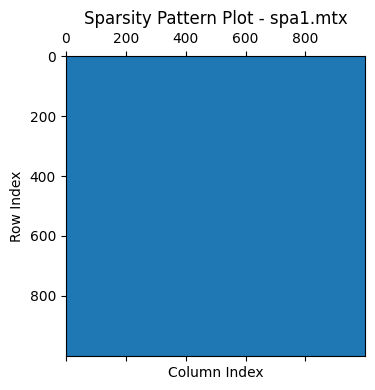

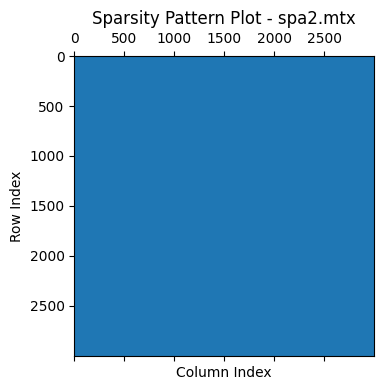

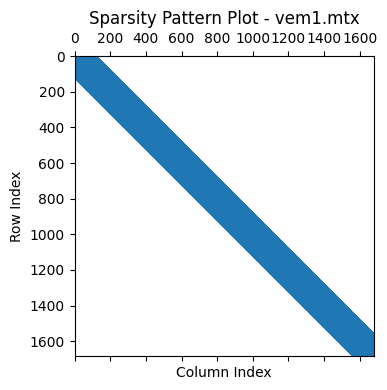

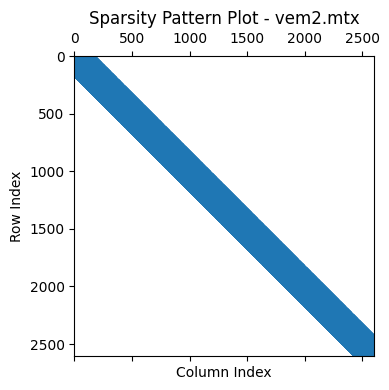

In [3]:
relative_path = 'data/'
matrix_names = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
for matrix_name in matrix_names:
    plt.figure(figsize=(4, 4))
    A = mmread(relative_path + matrix_name)
    ax = plt.spy(A)
    
    plt.title("Sparsity Pattern Plot - " + matrix_name)
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.xticks(rotation=0)
    plt.tight_layout()  
    plt.savefig("images/sparsita/" + matrix_name + ".png", bbox_inches='tight')

In [6]:
occupied_memory_sparse = np.zeros(4)
occupied_memory_dense = np.zeros(4)
non_zeros_matrix = np.zeros(4)
entries = np.zeros(4)
i = 0
for matrix_name in matrix_names:
    A = mmread(relative_path + matrix_name)
    occupied_memory_sparse[i] = compute_occupied_memory(A, dense = False)
    A = np.array(A.todense())
    occupied_memory_dense[i] = compute_occupied_memory(A, dense = True)
    entries[i] = len(A) * len(A[0])
    for k in range(len(A)):
        for j in range(len(A[0])):
            if A[k][j] != 0:
                non_zeros_matrix[i] = non_zeros_matrix[i] + 1
    i = i + 1

#in BYTE
print(occupied_memory_sparse)
print(occupied_memory_dense)
print(non_zeros_matrix)
print(entries)
print(non_zeros_matrix / entries)

[ 2918944. 26132768.   214160.   339600.]
[ 8000000. 72000000. 22606088. 54121608.]
[ 182264. 1631738.   13385.   21225.]
[1000000. 9000000. 2825761. 6765201.]
[0.182264   0.18130422 0.00473678 0.00313738]


## Autovalori

In [12]:
relative_path = 'data/'
matrix_names = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
i = 0
for matrix_name in matrix_names:
    A = mmread(relative_path + matrix_name)
    A = np.array(A.todense())
    eigenvalues = np.linalg.eigvals(A)
    print("max eig for ", matrix_name, " ", np.amax(eigenvalues))
    print("min eig for ", matrix_name, " ", np.amin(eigenvalues))

    plt.figure(figsize=(6, 4))
    plt.hist(eigenvalues, bins=50)
    plt.title("Eigenvalue Distribution - " + matrix_name)
    plt.xlabel("Eigenvalue")
    plt.ylabel("Frequency")
    plt.savefig("images/eigenvalues/distr " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    
    plt.figure(figsize=(6, 4))
    plt.boxplot(eigenvalues, vert=True)
    plt.title("Eigenvalue Distribution (Boxplot) - " + matrix_name)
    plt.ylabel("Eigenvalue")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("images/eigenvalues/box-plot " + matrix_name + ".png", bbox_inches='tight')
    plt.clf()
    
    i = i + 1


max eig for  spa1.mtx   999.4557624960859
min eig for  spa1.mtx   0.4879788596614001
max eig for  spa2.mtx   2998.3585105003103
min eig for  spa2.mtx   2.1235317898558517
max eig for  vem1.mtx   3.9999904971686884
min eig for  vem1.mtx   0.012321162236174375
max eig for  vem2.mtx   3.9999961061993
min eig for  vem2.mtx   0.007889192486217108


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [2]:
def is_diagonally_dominant(A):
    n = len(A)
    for i in range(n):
        row_sum = 0
        for j in range(n):
            if i != j:
                row_sum = row_sum + abs(A[i][j])
        if abs(A[i][i]) < row_sum:
            return False
    return True

In [5]:
relative_path = 'data/'
matrix_names = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
i = 0
for matrix_name in matrix_names:
    A = mmread(relative_path + matrix_name)
    A = np.array(A.todense())
    print(matrix_name, "is diag dom?", is_diagonally_dominant(A))
    
    i = i + 1


spa1.mtx is diag dom? False
spa2.mtx is diag dom? False
vem1.mtx is diag dom? False
vem2.mtx is diag dom? False
